In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data= pd.read_csv(city_data_to_load)
ride_data= pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
combine_data =  pd.merge(city_data, ride_data, how="outer", on="city")

# Display the data table for preview
combine_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

In [3]:
# Obtain the x and y coordinates for each of the three city types

#the avg fare per city
avg_fare = combine_data.groupby(["city"]).mean()["fare"]
avg_fare
#the avg count of rides
by_ride = combine_data.groupby(["city"]).count()["ride_id"]
by_ride
#driver count per city
#driver_count= combine_data.groupby("city")["driver_count"].count()
driver_count = combine_data.groupby(["city"])["driver_count"].unique()
driver_count = driver_count.str[0]
#city type
city_type = city_data.set_index('city')['type']
city_type.value_counts()

#collecting all data into a dataframe
py_cities= pd.DataFrame({"Avg Fare Per City":avg_fare, 
                         "Number of Rides":by_ride,
                        "Number of Drivers": driver_count, 
                         "city type": city_type})
py_cities.head()




,Avg Fare Per City,Number of Rides,Number of Drivers,city type
Amandaburgh,24.641667,18,12,Urban
Barajasview,25.332273,22,26,Urban
Barronchester,36.422500,16,11,Suburban
Bethanyland,32.956111,18,22,Suburban
Bradshawfurt,40.064000,10,7,Rural


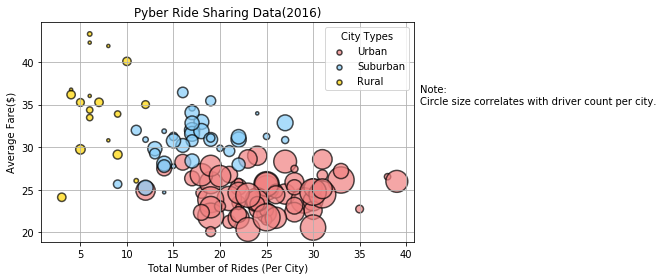

In [8]:
# Build the scatter plots for each city types
#urban
urban = py_cities.loc[py_cities["city type"]=="Urban"]
#suburban
suburban = py_cities.loc[py_cities["city type"]=="Suburban"]
#rural
rural = py_cities.loc[py_cities["city type"]=="Rural"]


#urban
plt.scatter(urban["Number of Rides"],urban["Avg Fare Per City"], marker="o",color="lightcoral", 
            edgecolors="black", s=urban["Number of Drivers"]*10, alpha=0.70, label="Urban", linewidth = 1.5)
#suburban
plt.scatter(suburban["Number of Rides"],suburban["Avg Fare Per City"], marker="o",color="lightskyblue", 
            edgecolors="black", s=suburban["Number of Drivers"]*10, alpha=0.70, label="Suburban", linewidth = 1.5)
#rural
plt.scatter(rural["Number of Rides"],rural["Avg Fare Per City"], marker="o",color="gold", 
            edgecolors="black", s=rural["Number of Drivers"]*10, alpha=0.70, label="Rural", linewidth = 1.5)


# Incorporate the other graph properties

plt.xlabel(r'Total Number of Rides (Per City)', fontsize=10)
plt.ylabel(r'Average Fare($)', fontsize=10)
plt.title('Pyber Ride Sharing Data(2016)')

plt.grid(True)
plt.tight_layout()

# Create a legend
legend = plt.legend(title = "City Types", loc="best")
legend.legendHandles[0]._sizes = [25]
legend.legendHandles[1]._sizes = [25]
legend.legendHandles[2]._sizes = [25]
# Incorporate a text label regarding circle size
plt.text(41.5, 36.5,"Note:")
plt.text(41.5, 35,"Circle size correlates with driver count per city.")
#plt.legend(title="City Types", loc="upper right")

# Save Figure
plt.savefig("images/pyber_ride_data.png", bbox_inches='tight')

In [ ]:
# Show plot
plt.show()


## Total Fares by City Type

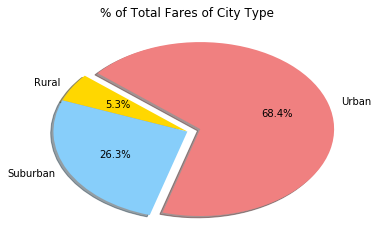

In [18]:
# Calculate Type Percents
fares_pq= combine_data.groupby(["type"]).count()["fare"]
fares_pq
# Build Pie Chart
cities_labels= ["Rural", "Suburban", "Urban"]
colors= ["gold", "lightskyblue", "lightcoral"]
explode= (0,0,0.1)
plt.pie(fares_pq, explode=explode, labels=cities_labels,colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
#plt.axis("equal")
plt.title("% of Total Fares of City Type")
# Save Figure
plt.savefig("images/pyber_fare_data.png", bbox_inches='tight')

In [19]:
# Show Figure
plt.show()

## Total Rides by City Type

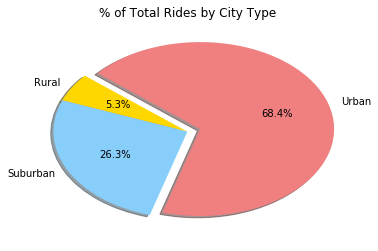

In [20]:
# Calculate Ride Percents
rides_pq= combine_data.groupby(["type"]).count()["ride_id"]
rides_pq
# Build Pie Chart
cities_labels= ["Rural", "Suburban", "Urban"]
colors= ["gold", "lightskyblue", "lightcoral"]
explode= (0,0,0.1)
plt.pie(rides_pq, explode=explode, labels=cities_labels,colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Rides by City Type")
# Save Figure
plt.savefig("images/totalpq_rides.png")

In [21]:
# Show Figure
plt.show()

## Total Drivers by City Type

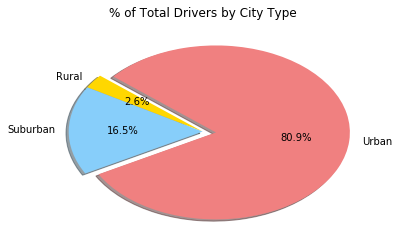

In [22]:
# Calculate Driver Percents
driver_pq= city_data.groupby(["type"]).sum()["driver_count"]
driver_pq
# Build Pie Chart
cities_labels= ["Rural", "Suburban", "Urban"]
colors= ["gold", "lightskyblue", "lightcoral"]
explode= (0,0,0.1)
plt.pie(driver_pq, explode=explode, labels=cities_labels,colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("images/totalpq_drivers.png")

In [ ]:
# Show Figure
plt.show()

Three observable trends based on the data above:

First: 

    Rides in Urban cities are relatively cheaper than all other city type and have the most drivers.

Second:

    There are more drivers in suburan cities than in rural, Rural cities have   the least number of drivers.

Third:

    Based on the data above, the higher the driver count per city, the cheaper   the fare and most drivers are currently based in Urban cities.